In [131]:
import numpy as np
import sep

In [132]:
# additional setup for reading the test image and displaying plots
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [133]:
hdulist = fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
data = hdulist[0].data

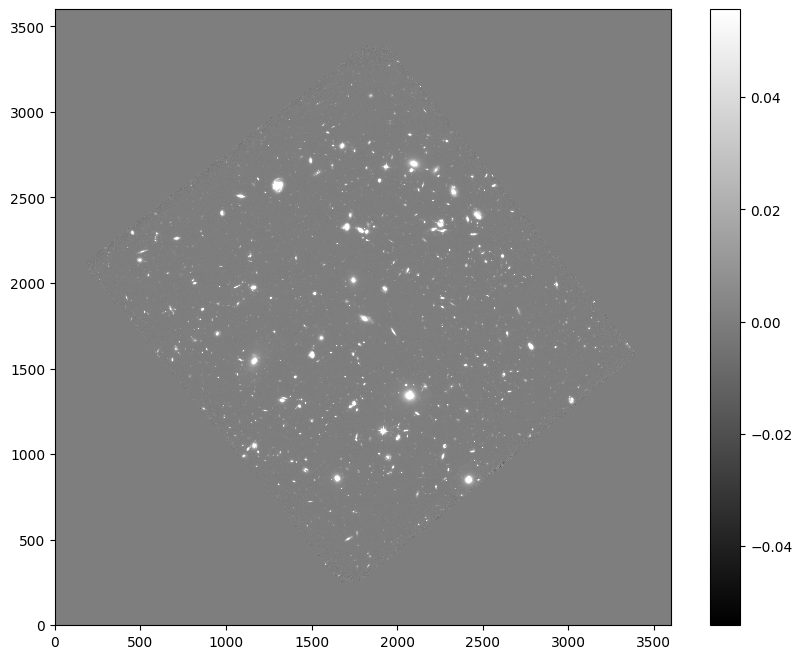

In [134]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [135]:
# measure a spatially varying background on the image
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [136]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [137]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

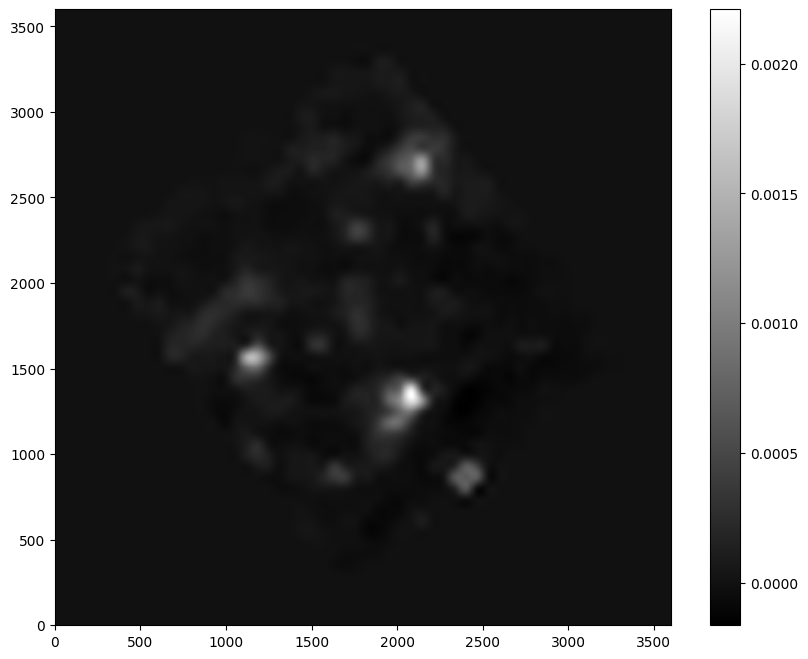

In [138]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [139]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

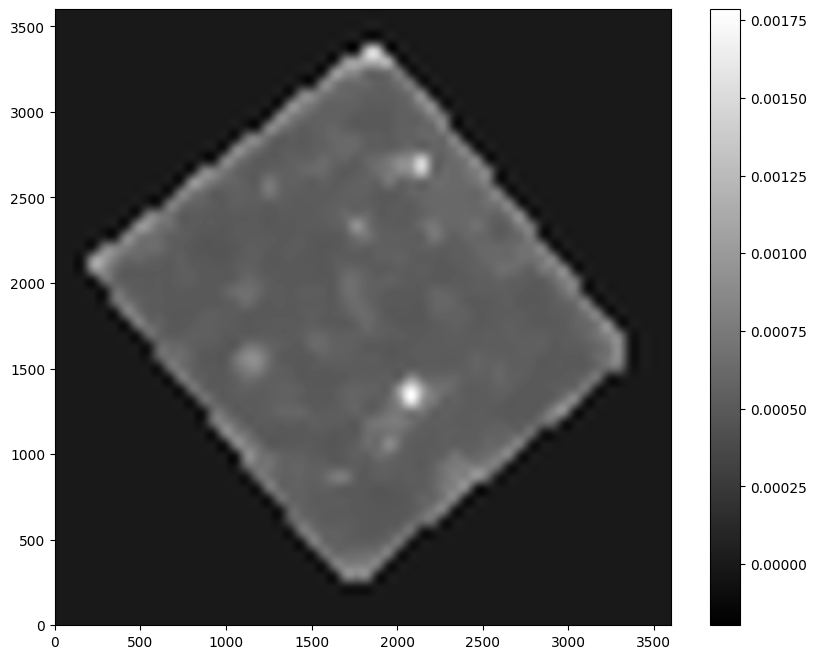

In [140]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [141]:
# subtract the background
data_sub = data - bkg

In [142]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [143]:
# how many objects were detected
len(objects)

8640

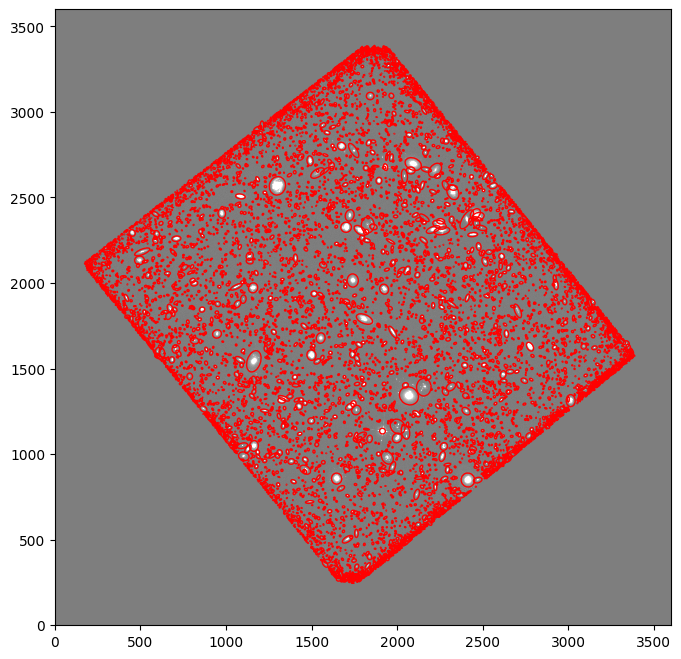

In [144]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [145]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [146]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [147]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


Number of sources detected: 8640


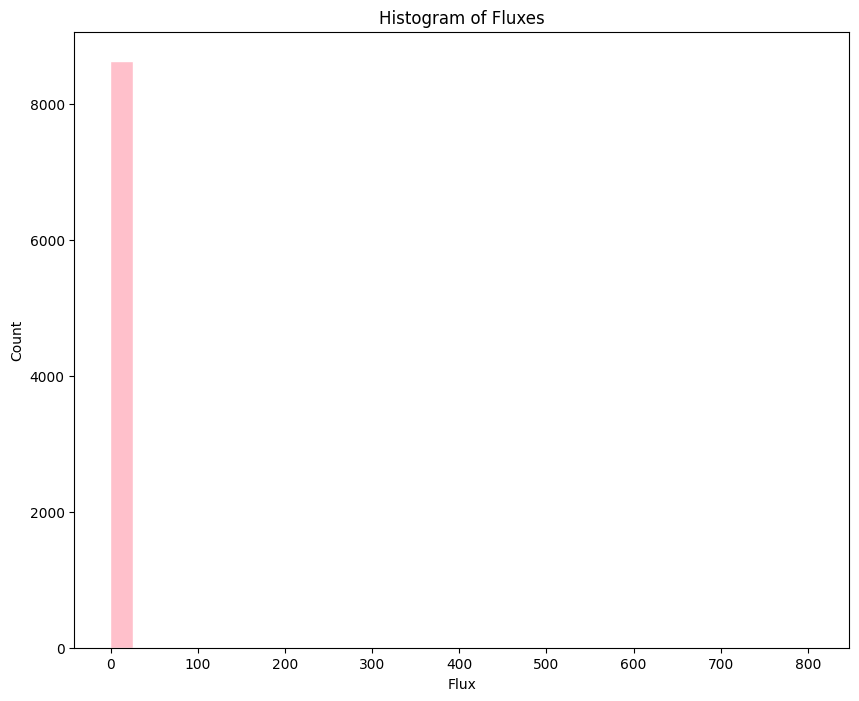

In [148]:
print("Number of sources detected:", len(objects))
plt.hist(flux, bins=30, color='pink', edgecolor='white')
plt.xlabel('Flux')
plt.ylabel('Count')
plt.title('Histogram of Fluxes')
plt.show()

In [149]:
mean_flux = np.mean(flux)
median_flux = np.median(flux)
std_dev_flux = np.std(flux)

print("Mean flux:", mean_flux)
print("Median flux:", median_flux)
print("Standard deviation of fluxes:", std_dev_flux)

largest_outlier_index = np.argmax(flux)
largest_outlier_flux = flux[largest_outlier_index]
largest_outlier_position = (objects['x'][largest_outlier_index], objects['y'][largest_outlier_index])

print("Largest outlier flux:", largest_outlier_flux)
print("Position of largest outlier (x, y):", largest_outlier_position)

std_devs_away = (largest_outlier_flux - mean_flux) / std_dev_flux
print("Number of standard deviations away from the mean:", std_devs_away)


Mean flux: 0.36186200072018937
Median flux: 0.03095655805023853
Standard deviation of fluxes: 9.24352784277779
Largest outlier flux: 807.2972835731507
Position of largest outlier (x, y): (1914.2549094866436, 1134.3164850725645)
Number of standard deviations away from the mean: 87.29734310292692


/var/folders/pq/8bltcx1s2n9_jnkn_k2l7xrr0000gn/T/ipykernel_72368/1876545169.py:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(data_f105w))
/var/folders/pq/8bltcx1s2n9_jnkn_k2l7xrr0000gn/T/ipykernel_72368/1876545169.py:23: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(data_f105w))


Sum of f105w data: 10255.235


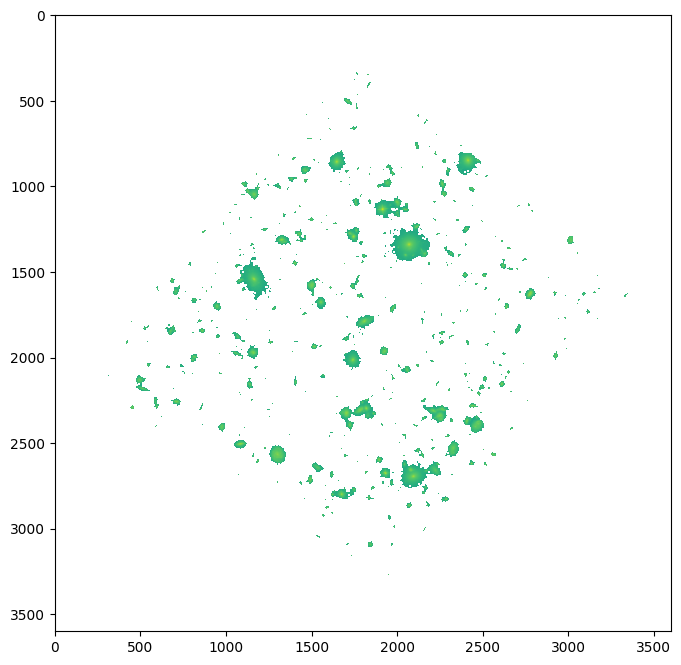

In [151]:
# Loading the three files: f105w, f125w, and f160w FITS files
hdu_f105w = hdulist
hdu_f125w = fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits')
hdu_f160w = fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits')

#Setting the image data
data_f105w = hdu_f105w[0].data
data_f125w = hdu_f125w[0].data
data_f160w = hdu_f160w[0].data

# Combinging the data into the RBG channels
rgb_data = []
for x in range(len(data_f105w)):
    rgb_channel = []
    for y in range(len(data_f105w[x])):
        rgb_channel.append([data_f105w[x][y]])
        rgb_channel.append([data_f125w[x][y]])
        rgb_channel.append([data_f160w[x][y]])
    rgb_data.append(rgb_channel)
rgb_data = np.array(rgb_data)

# Display an image (e.g., log of f105w data)
plt.imshow(np.log(data_f105w))

# Example of data analysis (e.g., sum of f105w data)
print("Sum of f105w data:", np.sum(data_f105w))